In [1]:
# Using Steven's cleaned data in this notebook to compare against Scott's clean data in model 1
# and see if there is a difference

In [2]:
# Importing necessary libraries
import psycopg2
import config as creds
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats

In [3]:
def connect():
    
    # Set up a connection to the postgres server.
    conn_string = "host="+ creds.PGHOST +" port="+ "5432" +" dbname="+ creds.PGDATABASE +" user=" + creds.PGUSER \
                  +" password="+ creds.PGPASSWORD
    
    conn = psycopg2.connect(conn_string)
    print("Connected!")

    # Create a cursor object
    cursor = conn.cursor()
    
    return conn, cursor

In [4]:
# Connecting to DB
conn, cursor = connect()

Connected!


In [5]:
# Run SQL          
df_life_expect = pd.read_sql('SELECT * FROM life_expect', conn)

df_life_expect

,country,year_,status,life_expectancy,adult_mortality,infant_death,alcohol,percentage_expenditure,hepatitis,measles,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,population_,thinness_1to19,thinness_5to9,income_composition,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279625,65.0,1154,...,6.0,8.16,65.0,0.1,17.2,17.3,0.479,10.1,34413604.0,1.913421e+10
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523580,62.0,492,...,58.0,8.18,62.0,0.1,17.5,17.5,0.476,10.0,33370804.0,2.049713e+10
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219246,64.0,430,...,62.0,8.13,64.0,0.1,17.7,17.7,0.470,9.9,32269592.0,2.014640e+10
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184210,67.0,2787,...,67.0,8.52,67.0,0.1,17.9,18.0,0.463,9.8,31161378.0,1.990732e+10
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,18.2,18.2,0.454,9.5,30117412.0,1.780511e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,Zimbabwe,2009,Developing,50.0,587.0,30,4.64,1.040021,73.0,853,...,69.0,6.26,73.0,18.1,7.5,7.4,0.419,9.9,12526964.0,9.665793e+09
2017,Zimbabwe,2008,Developing,48.2,632.0,30,3.56,20.843430,75.0,0,...,75.0,4.96,75.0,20.5,7.8,7.8,0.421,9.7,12379553.0,4.415703e+09
2018,Zimbabwe,2007,Developing,46.6,67.0,29,3.88,29.814566,72.0,242,...,73.0,4.47,73.0,23.7,8.2,8.2,0.414,9.6,12255920.0,5.291950e+09
2019,Zimbabwe,2006,Developing,45.4,7.0,28,4.57,34.262170,68.0,212,...,71.0,5.12,7.0,26.8,8.6,8.6,0.408,9.5,12155496.0,5.443896e+09


<AxesSubplot:>

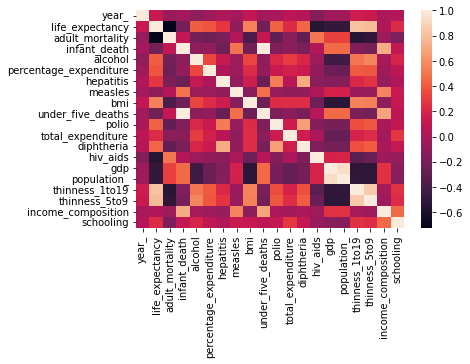

In [6]:
#Looking at heatmap for correlation/collinearity
corr = df_life_expect.corr()
sns.heatmap(corr,
           xticklabels=corr.columns,
           yticklabels=corr.columns)

In [7]:
#drop unneccesary columns
life_expect_df = df_life_expect.drop(["country", "year_", "infant_death"], axis = 1)
life_expect_df

,status,life_expectancy,adult_mortality,alcohol,percentage_expenditure,hepatitis,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population_,thinness_1to19,thinness_5to9,income_composition,schooling
0,Developing,65.0,263.0,0.01,71.279625,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,17.2,17.3,0.479,10.1,34413604.0,1.913421e+10
1,Developing,59.9,271.0,0.01,73.523580,62.0,492,18.6,86,58.0,8.18,62.0,0.1,17.5,17.5,0.476,10.0,33370804.0,2.049713e+10
2,Developing,59.9,268.0,0.01,73.219246,64.0,430,18.1,89,62.0,8.13,64.0,0.1,17.7,17.7,0.470,9.9,32269592.0,2.014640e+10
3,Developing,59.5,272.0,0.01,78.184210,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,17.9,18.0,0.463,9.8,31161378.0,1.990732e+10
4,Developing,59.2,275.0,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,18.2,18.2,0.454,9.5,30117412.0,1.780511e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,Developing,50.0,587.0,4.64,1.040021,73.0,853,29.0,45,69.0,6.26,73.0,18.1,7.5,7.4,0.419,9.9,12526964.0,9.665793e+09
2017,Developing,48.2,632.0,3.56,20.843430,75.0,0,28.6,46,75.0,4.96,75.0,20.5,7.8,7.8,0.421,9.7,12379553.0,4.415703e+09
2018,Developing,46.6,67.0,3.88,29.814566,72.0,242,28.2,46,73.0,4.47,73.0,23.7,8.2,8.2,0.414,9.6,12255920.0,5.291950e+09
2019,Developing,45.4,7.0,4.57,34.262170,68.0,212,27.9,45,71.0,5.12,7.0,26.8,8.6,8.6,0.408,9.5,12155496.0,5.443896e+09


In [8]:
# Converting the categorical variable into numerical

# Creating dummy variable
status = pd.get_dummies(life_expect_df['status'])

# Check what the dataset 'status' looks like
status

,Developed,Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
2016,0,1
2017,0,1
2018,0,1
2019,0,1


In [9]:
# Dropping the first column from status dataset
status = pd.get_dummies(life_expect_df["status"], drop_first = True)

# Adding the status to the original dataframe
life_expect_df = pd.concat([life_expect_df, status], axis = 1)

# Dropping 'Status' as we have created the dummies for it
life_expect_df.drop(["status"], axis = 1, inplace = True)

life_expect_df

,life_expectancy,adult_mortality,alcohol,percentage_expenditure,hepatitis,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population_,thinness_1to19,thinness_5to9,income_composition,schooling,Developing
0,65.0,263.0,0.01,71.279625,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,17.2,17.3,0.479,10.1,34413604.0,1.913421e+10,1
1,59.9,271.0,0.01,73.523580,62.0,492,18.6,86,58.0,8.18,62.0,0.1,17.5,17.5,0.476,10.0,33370804.0,2.049713e+10,1
2,59.9,268.0,0.01,73.219246,64.0,430,18.1,89,62.0,8.13,64.0,0.1,17.7,17.7,0.470,9.9,32269592.0,2.014640e+10,1
3,59.5,272.0,0.01,78.184210,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,17.9,18.0,0.463,9.8,31161378.0,1.990732e+10,1
4,59.2,275.0,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,18.2,18.2,0.454,9.5,30117412.0,1.780511e+10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,50.0,587.0,4.64,1.040021,73.0,853,29.0,45,69.0,6.26,73.0,18.1,7.5,7.4,0.419,9.9,12526964.0,9.665793e+09,1
2017,48.2,632.0,3.56,20.843430,75.0,0,28.6,46,75.0,4.96,75.0,20.5,7.8,7.8,0.421,9.7,12379553.0,4.415703e+09,1
2018,46.6,67.0,3.88,29.814566,72.0,242,28.2,46,73.0,4.47,73.0,23.7,8.2,8.2,0.414,9.6,12255920.0,5.291950e+09,1
2019,45.4,7.0,4.57,34.262170,68.0,212,27.9,45,71.0,5.12,7.0,26.8,8.6,8.6,0.408,9.5,12155496.0,5.443896e+09,1


In [10]:
# Checking for null values
print(life_expect_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021 entries, 0 to 2020
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   life_expectancy         2013 non-null   float64
 1   adult_mortality         2013 non-null   float64
 2   alcohol                 1832 non-null   float64
 3   percentage_expenditure  2021 non-null   float64
 4   hepatitis               1821 non-null   float64
 5   measles                 2021 non-null   int64  
 6   bmi                     1997 non-null   float64
 7   under_five_deaths       2021 non-null   int64  
 8   polio                   2014 non-null   float64
 9   total_expenditure       1813 non-null   float64
 10  diphtheria              2014 non-null   float64
 11  hiv_aids                2021 non-null   float64
 12  gdp                     1997 non-null   float64
 13  population_             1997 non-null   float64
 14  thinness_1to19          1906 non-null   

In [11]:
life_expect_df = life_expect_df.dropna()

In [12]:

# Checking for null values
print(life_expect_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1551 entries, 0 to 2020
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   life_expectancy         1551 non-null   float64
 1   adult_mortality         1551 non-null   float64
 2   alcohol                 1551 non-null   float64
 3   percentage_expenditure  1551 non-null   float64
 4   hepatitis               1551 non-null   float64
 5   measles                 1551 non-null   int64  
 6   bmi                     1551 non-null   float64
 7   under_five_deaths       1551 non-null   int64  
 8   polio                   1551 non-null   float64
 9   total_expenditure       1551 non-null   float64
 10  diphtheria              1551 non-null   float64
 11  hiv_aids                1551 non-null   float64
 12  gdp                     1551 non-null   float64
 13  population_             1551 non-null   float64
 14  thinness_1to19          1551 non-null   

In [13]:
# Set random seed and split data into test and train sets
np.random.seed(0)
df_train, df_test = train_test_split(life_expect_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [14]:
df_train

,life_expectancy,adult_mortality,alcohol,percentage_expenditure,hepatitis,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population_,thinness_1to19,thinness_5to9,income_composition,schooling,Developing
1674,81.6,66.0,9.99,5047.254000,96.0,41,62.9,2,96.0,9.52,96.0,0.1,0.6,0.5,0.858,16.3,46362944.0,1.491470e+12,0
1774,73.5,162.0,5.92,609.951200,98.0,7790,25.7,13,99.0,3.92,99.0,0.3,8.5,8.6,0.700,12.9,66530980.0,2.913830e+11,1
1718,52.6,46.0,4.90,47.616450,88.0,26,29.3,4,89.0,8.46,88.0,33.7,5.8,5.9,0.519,10.8,1057462.0,3.580417e+09,1
1364,61.6,288.0,0.82,20.533276,66.0,0,44.2,14,79.0,4.36,73.0,1.1,1.4,1.3,0.477,9.2,7144774.0,1.161964e+10,1
170,80.0,81.0,10.22,665.735600,97.0,40,61.9,1,98.0,1.17,98.0,0.1,0.9,0.9,0.878,15.9,10895586.0,4.814210e+11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,75.7,12.0,8.11,1504.329500,91.0,3,6.4,10,93.0,5.89,91.0,0.1,1.0,0.9,0.816,17.1,41261488.0,5.301630e+11,1
407,73.1,144.0,4.38,531.980830,93.0,0,5.5,18,93.0,5.82,93.0,0.1,2.4,2.1,0.658,11.1,42647732.0,1.456190e+11,1
87,81.0,67.0,10.30,579.133200,95.0,10,61.5,2,92.0,8.45,92.0,0.1,0.7,0.6,0.910,20.3,20394800.0,6.950750e+11,0
1022,45.3,654.0,2.61,71.155780,91.0,1,27.9,6,88.0,7.12,89.0,34.1,8.8,8.7,0.437,10.7,1989933.0,1.800106e+09,1


In [15]:
# Dividing the training data set into X and Y
y_train = df_train.pop("life_expectancy")
X_train = df_train

In [16]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.summary()

/Users/Scott/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     275.0
Date:                Mon, 12 Sep 2022   Prob (F-statistic):               0.00
Time:                        02:07:41   Log-Likelihood:                -2908.4
No. Observations:                1085   AIC:                             5855.
Df Residuals:                    1066   BIC:                             5950.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     54.0230      1.066     50.685      0.000      51.932      56.114
adult_mortality           -0.0164      0.001    -13.256      0.000      -0.019      -0.014
alcohol                   -0.0548      0.037     -1.469      0.142      -0.128       0.018
percentage_expenditure     0.0004   7.72e-05      4.924      0.000       0.000       0.001
hepatitis                 -0.0169      0.006     -2.649      0.008      -0.030      -0.004
measles                -2.066e-05   1.96e-05     -1.055      0.292   -5.91e-05    1.78e-05
bmi                        0.0272      0.007      3.823      0.000       0.013       0.041
under_five_deaths         -0.0055      0.001     -4.231      0.000      -0.008      -0.003
polio                      0.0189      0.007      2.798      0.005       0.006       0.032
total_expenditure          0.0177      0.049      0.364      0.716      -0.078       0.113
diphtheria                 0.0321      0.008      3.950      0.000       0.016       0.048
hiv_aids                  -0.5220      0.027    -19.151      0.000      -0.576      -0.469
gdp                       -0.0388      0.070     -0.551      0.582      -0.177       0.099
population_               -0.0121      0.069     -0.176      0.860      -0.147       0.123
thinness_1to19            13.0316      1.179     11.052      0.000      10.718      15.345
thinness_5to9              0.6635      0.076      8.772      0.000       0.515       0.812
income_composition      6.681e-09   2.11e-09      3.166      0.002    2.54e-09    1.08e-08
schooling              -2.259e-13   2.72e-13     -0.831      0.406    -7.6e-13    3.08e-13
Developing                -1.2911      0.430     -3.003      0.003      -2.135      -0.447
==============================================================================
Omnibus:                       54.085   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.135
Skew:                           0.060   Prob(JB):                     7.66e-40
Kurtosis:                       4.993   Cond. No.                     9.37e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.37e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
# Variance Inflation Factor or VIF is a quantitative value that says how much the feature variables are correlated 
# with each other. It is an extremely important parameter to test our linear model. 
# The formula for VIF is:VIF = 1/(1-Ri²)


# Checking for the VIF values of the variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,income_composition,9.80
11,gdp,8.59
12,population_,8.56
16,schooling,4.04
6,under_five_deaths,3.62
14,thinness_5to9,3.44
13,thinness_1to19,3.22
4,measles,2.64
9,diphtheria,2.42
3,hepatitis,1.99


In [18]:
# Dropping highly correlated variables and insignificant variables one at a time 
X = X_train.drop("total_expenditure", axis=1,)

# Build a fitted model after dropping the variable
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     291.4
Date:                Mon, 12 Sep 2022   Prob (F-statistic):               0.00
Time:                        02:07:41   Log-Likelihood:                -2908.5
No. Observations:                1085   AIC:                             5853.
Df Residuals:                    1067   BIC:                             5943.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     54

/Users/Scott/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [19]:
# Calculating the VIFs again for the new model after dropping infant deaths

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,income_composition,9.80
10,gdp,8.59
11,population_,8.56
15,schooling,4.04
6,under_five_deaths,3.62
13,thinness_5to9,3.32
12,thinness_1to19,3.20
4,measles,2.64
8,diphtheria,2.39
3,hepatitis,1.98


In [20]:
X = X.drop("population_", axis = 1)
# Build a third fitted model
X_train_lm = sm.add_constant(X)
lr_3 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     309.9
Date:                Mon, 12 Sep 2022   Prob (F-statistic):               0.00
Time:                        02:07:41   Log-Likelihood:                -2908.5
No. Observations:                1085   AIC:                             5851.
Df Residuals:                    1068   BIC:                             5936.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     54

/Users/Scott/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [21]:
# Calculating the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,income_composition,9.75
14,schooling,4.02
6,under_five_deaths,3.62
12,thinness_5to9,3.31
11,thinness_1to19,3.20
4,measles,2.63
8,diphtheria,2.39
3,hepatitis,1.98
1,alcohol,1.88
10,gdp,1.85


In [22]:
X = X.drop("schooling", axis = 1)
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)
lr_4 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     330.6
Date:                Mon, 12 Sep 2022   Prob (F-statistic):               0.00
Time:                        02:07:41   Log-Likelihood:                -2908.9
No. Observations:                1085   AIC:                             5850.
Df Residuals:                    1069   BIC:                             5930.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     54

/Users/Scott/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [23]:
# Calculating the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,thinness_5to9,67.78
11,thinness_1to19,50.34
8,diphtheria,43.01
7,polio,29.20
3,hepatitis,24.87
14,Developing,10.18
5,bmi,8.03
0,adult_mortality,4.26
10,gdp,4.14
1,alcohol,3.97


In [24]:
X = X.drop("thinness_5to9", axis = 1)
# Build a fifth fitted model
X_train_lm = sm.add_constant(X)
lr_5 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     325.3
Date:                Mon, 12 Sep 2022   Prob (F-statistic):               0.00
Time:                        02:07:41   Log-Likelihood:                -2947.0
No. Observations:                1085   AIC:                             5924.
Df Residuals:                    1070   BIC:                             5999.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     57

/Users/Scott/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [25]:
# Calculating the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,diphtheria,42.31
7,polio,28.64
11,thinness_1to19,25.52
3,hepatitis,24.86
13,Developing,9.97
5,bmi,7.74
0,adult_mortality,4.26
10,gdp,4.12
12,income_composition,3.94
1,alcohol,3.63


In [26]:
X = X.drop("alcohol", axis = 1)
# Build a sixth fitted model
X_train_lm = sm.add_constant(X)
lr_6 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     350.4
Date:                Mon, 12 Sep 2022   Prob (F-statistic):               0.00
Time:                        02:07:42   Log-Likelihood:                -2947.3
No. Observations:                1085   AIC:                             5923.
Df Residuals:                    1071   BIC:                             5992.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     57

/Users/Scott/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [27]:
# Calculating the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,diphtheria,42.13
6,polio,28.58
2,hepatitis,24.85
10,thinness_1to19,22.66
12,Developing,8.66
4,bmi,7.73
0,adult_mortality,4.05
9,gdp,3.95
11,income_composition,3.94
5,under_five_deaths,2.77


In [28]:
X = X.drop("measles", axis = 1)
# Build a seventh fitted model
X_train_lm = sm.add_constant(X)
lr_7 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     379.3
Date:                Mon, 12 Sep 2022   Prob (F-statistic):               0.00
Time:                        02:07:42   Log-Likelihood:                -2948.0
No. Observations:                1085   AIC:                             5922.
Df Residuals:                    1072   BIC:                             5987.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     57

/Users/Scott/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [29]:
# Calculating the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,diphtheria,42.10
5,polio,28.58
2,hepatitis,24.84
9,thinness_1to19,22.65
11,Developing,8.65
3,bmi,7.73
0,adult_mortality,4.04
8,gdp,3.95
4,under_five_deaths,2.75
10,income_composition,2.24


In [30]:
X = X.drop("diphtheria", axis = 1)
# Build a eigth fitted model
X_train_lm = sm.add_constant(X)
lr_8 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     403.8
Date:                Mon, 12 Sep 2022   Prob (F-statistic):               0.00
Time:                        02:07:42   Log-Likelihood:                -2959.2
No. Observations:                1085   AIC:                             5942.
Df Residuals:                    1073   BIC:                             6002.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     57

/Users/Scott/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [31]:
# Calculating the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,polio,23.29
8,thinness_1to19,21.34
2,hepatitis,17.15
10,Developing,8.56
3,bmi,7.72
0,adult_mortality,4.04
7,gdp,3.95
4,under_five_deaths,2.74
9,income_composition,2.24
1,percentage_expenditure,1.67


In [32]:
X = X.drop("hepatitis", axis = 1)
# Build a eigth fitted model
X_train_lm = sm.add_constant(X)
lr_9 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     444.5
Date:                Mon, 12 Sep 2022   Prob (F-statistic):               0.00
Time:                        02:07:42   Log-Likelihood:                -2959.2
No. Observations:                1085   AIC:                             5940.
Df Residuals:                    1074   BIC:                             5995.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     57

/Users/Scott/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [33]:
# Calculating the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,thinness_1to19,20.66
4,polio,16.21
9,Developing,8.51
2,bmi,7.68
0,adult_mortality,4.02
6,gdp,3.89
3,under_five_deaths,2.67
8,income_composition,2.23
1,percentage_expenditure,1.66
5,hiv_aids,1.48


In [34]:
X = X.drop("thinness_1to19", axis = 1)
# Build a eigth fitted model
X_train_lm = sm.add_constant(X)
lr_10 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_10.summary())

/Users/Scott/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     325.5
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          1.04e-299
Time:                        02:07:42   Log-Likelihood:                -3133.7
No. Observations:                1085   AIC:                             6287.
Df Residuals:                    1075   BIC:                             6337.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     69

In [35]:
# Calculating the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,polio,10.05
8,Developing,8.31
2,bmi,5.63
0,adult_mortality,4.02
6,gdp,3.89
3,under_five_deaths,2.67
7,income_composition,2.22
1,percentage_expenditure,1.52
5,hiv_aids,1.46


In [36]:
X = X.drop("polio", axis = 1)
# Build a eigth fitted model
X_train_lm = sm.add_constant(X)
lr_11 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     332.4
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          1.46e-284
Time:                        02:07:42   Log-Likelihood:                -3172.0
No. Observations:                1085   AIC:                             6362.
Df Residuals:                    1076   BIC:                             6407.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     75

/Users/Scott/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [37]:
# Calculating the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Developing,7.05
0,adult_mortality,3.93
2,bmi,3.86
5,gdp,3.62
3,under_five_deaths,2.56
6,income_composition,2.16
4,hiv_aids,1.46
1,percentage_expenditure,1.43


In [38]:
X = X.drop("Developing", axis = 1)
# Build a eigth fitted model
X_train_lm = sm.add_constant(X)
lr_12 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     351.5
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          6.31e-273
Time:                        02:07:42   Log-Likelihood:                -3202.1
No. Observations:                1085   AIC:                             6420.
Df Residuals:                    1077   BIC:                             6460.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     71

/Users/Scott/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [39]:
# Calculating the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,adult_mortality,3.34
5,gdp,2.63
3,under_five_deaths,2.50
2,bmi,2.25
6,income_composition,2.13
4,hiv_aids,1.46
1,percentage_expenditure,1.33


/Users/Scott/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

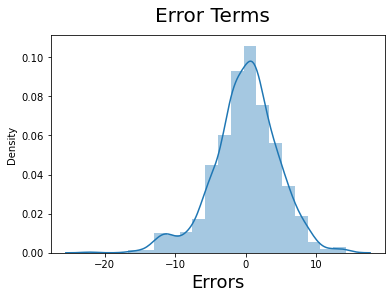

In [40]:
y_train_price = lr_12.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [41]:
df_test

,life_expectancy,adult_mortality,alcohol,percentage_expenditure,hepatitis,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population_,thinness_1to19,thinness_5to9,income_composition,schooling,Developing
1943,75.7,123.0,6.35,152.544850,96.0,0,58.3,1,96.0,11.15,96.0,0.1,1.6,1.6,0.753,15.5,3321799.0,1.736286e+10,1
1418,79.6,88.0,12.25,3119.349900,97.0,5,58.1,0,97.0,1.44,98.0,0.1,0.7,0.5,0.812,16.0,10573100.0,2.381130e+11,0
1080,57.6,377.0,0.01,59.487450,91.0,3,19.2,40,87.0,11.38,91.0,5.1,6.5,6.3,0.466,10.7,16289550.0,6.047814e+09,1
1185,66.3,25.0,5.80,22.316242,96.0,7,46.9,2,96.0,4.70,96.0,0.1,2.2,2.3,0.693,14.3,2719902.0,7.189482e+09,1
1874,56.3,41.0,9.79,72.850235,71.0,1319,15.6,130,69.0,9.10,71.0,8.2,6.2,6.2,0.453,10.6,30431734.0,1.444040e+10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,77.0,9.0,4.12,75.610630,91.0,0,54.7,0,87.0,9.46,89.0,0.1,2.4,2.4,0.735,14.2,3542598.0,1.817234e+10,1
543,75.5,127.0,3.92,41.880880,88.0,72,52.1,8,85.0,6.48,87.0,0.1,1.3,1.2,0.717,13.3,15474099.0,8.792455e+10,1
1312,49.2,4.0,9.71,6.416253,18.0,110927,19.3,893,45.0,4.11,36.0,5.4,12.9,12.9,0.463,8.9,138865010.0,1.761340e+11,1
1709,69.5,22.0,4.72,685.029900,84.0,0,52.6,0,84.0,5.92,84.0,0.8,3.5,3.4,0.684,11.7,511181.0,2.936612e+09,1


In [42]:
y_test = df_test.pop("life_expectancy")
X_test = df_test

# Adding constant variable to test dataframe
X_test_m12 = sm.add_constant(X_test)

# Creating X_test_m4 dataframe by dropping variables from X_test_m4
X_test_m12 = X_test_m12.drop(["alcohol", "hepatitis", "measles", "thinness_5to9", "schooling",
                            "diphtheria", "polio", "total_expenditure", "thinness_1to19",
                             "Developing", "population_"], axis = 1) 
                            
# Making predictions using the final model
y_pred_m12 = lr_12.predict(X_test_m12)

/Users/Scott/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [43]:
from sklearn.metrics import r2_score
r2_score(y_true = y_test, y_pred = y_pred_m12)

0.7191553291049915